# **Le voyageur de commerce**

Vous êtes chargé de résoudre un problème d'optimisation simplifié inspiré du Voyageur de Commerce (TSP). On vous fournit une liste de villes sous forme de nœuds avec leurs coordonnées (x, y).

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

### **1. Charger et représenter les données**

- Écrire une fonction `charger_villes(chemin)` qui prend en paramètre le chemin du fichier (ex : "villes.txt") et retourne une liste de tuples (NomVille, X, Y).

In [ ]:
def charger_villes(chemin):
    try:
        villes = []
        with open(chemin, "r") as file:
            data = file.readlines()
            for line in data:
                x = line.split()[-2]
                y = line.split()[-1]
                ville = " ".join(line.split()[:-2]).strip('"')
                villes.append((ville, x, y))
            
        return villes
    
    except FileNotFoundError as e:
        print(e)

- Afficher la liste des villes chargées ainsi que leur nombre total.

In [44]:
villes = charger_villes("villes.txt")

print("Nombre de villes :", len(villes))
print("Les 10 premières :")
villes[:10]

Nombre de villes : 627
Les 10 premières :


[('Paris', '48.8567', '2.3522'),
 ('Bordeaux', '44.84', '-0.58'),
 ('Marseille', '43.2964', '5.37'),
 ('Lyon', '45.76', '4.84'),
 ('Toulouse', '43.6045', '1.444'),
 ('Nice', '43.7034', '7.2663'),
 ('Nantes', '47.2181', '-1.5528'),
 ('Montpellier', '43.6119', '3.8772'),
 ('Strasbourg', '48.5833', '7.7458'),
 ('Lille', '50.6278', '3.0583')]

### **2. Calcul des distances**

- Écrire une fonction `distance(villeA, villeB)` qui, étant donné deux tuples (NomVille, X, Y), retourne la distance Euclidienne entre elles.

In [190]:
def distance(villeA, villeB):
    try:
        x1 = float(villeA[1])
        y1 = float(villeA[2])
        
        x2 = float(villeB[1])
        y2 = float(villeB[2])
        
        return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    
    except AssertionError as e:
        print("Erreur : Les données en entrée doivent être des tuples.")
        
    except ValueError as e:
        print("Erreur :", e)

- Tester votre fonction en affichant la distance entre au moins 2 paires de villes de votre liste.

In [151]:
print("Distance Paris-Bordeaux :", distance(villes[0], villes[1]))

Distance Paris-Bordeaux : 4.973095186098889


### **3. Heuristique simple pour le Voyageur de Commerce**

- Le but ici n'est pas de résoudre parfaitement le TSP, mais de proposer une heuristique simple : partir de la première ville de la liste, puis à chaque étape, aller à la ville la plus proche non encore visitée. Continuer jusqu'à avoir visité toutes les villes.
- Écrire une fonction `itineraire_greedy(villes)` qui, étant donnée une liste de villes, retourne une liste représentant l'ordre de visite de ces villes selon l'heuristique décrite.

In [187]:
def itineraire_greedy(villes):
    villes = np.array(villes)
    visitees = [villes[0]]
    ville_visitee = visitees[-1][0]
    ville_visitee_id = np.where(villes[:, 0] == ville_visitee)
    restantes = np.delete(villes, ville_visitee_id, axis=0)
    
    while len(visitees) != len(villes):
        distances = np.apply_along_axis(
            func1d=distance,
            axis=1,
            arr=restantes,
            villeB=visitees[-1]
        )
        ville_visitee_id = np.argmin(distances)
        visitees.append(restantes[ville_visitee_id])
        restantes = np.delete(restantes, ville_visitee_id, axis=0)
        
    return visitees

-  Afficher lʼordre proposé par l'algorithme.

In [ ]:
itineraire = itineraire_greedy(villes)

print("Nombre de villes visitées :", len(itineraire))
print("Les 10 premières visitées :")
itineraire[:10]

Nombre de villes visitées : 627
Les 10 premières visitées :


[array(['Paris', '48.8567', '2.3522'], dtype='<U25'),
 array(['Belleville', '48.871', '2.385'], dtype='<U25'),
 array(['Le Pré-Saint-Gervais', '48.8833', '2.4'], dtype='<U25'),
 array(['Pantin', '48.8966', '2.4017'], dtype='<U25'),
 array(['Les Lilas', '48.88', '2.42'], dtype='<U25'),
 array(['Bagnolet', '48.8692', '2.4181'], dtype='<U25'),
 array(['Romainville', '48.884', '2.435'], dtype='<U25'),
 array(['Noisy-le-Sec', '48.8894', '2.4503'], dtype='<U25'),
 array(['Bobigny', '48.9106', '2.4397'], dtype='<U25'),
 array(['Drancy', '48.93', '2.45'], dtype='<U25')]

### **4. Calcul de la distance totale de la tournée**

- Écrire une fonction `distance_totale(itineraire)` qui calcule la somme des distances entre chaque ville dans l'ordre donné par l'itinéraire, en considérant que l'on ne revient pas à la ville de départ.

In [204]:
def distance_totale(itineraire):
    distance_parcourue = 0
    for i in range(len(itineraire) - 1):
        distance_parcourue += distance(itineraire[i], itineraire[i+1])
    return distance_parcourue

- Afficher la distance totale de la tournée retournée par votre heuristique.

In [ ]:
distance_totale(itineraire)

np.float64(112.83477591655196)

### **5. Affichage et analyse**

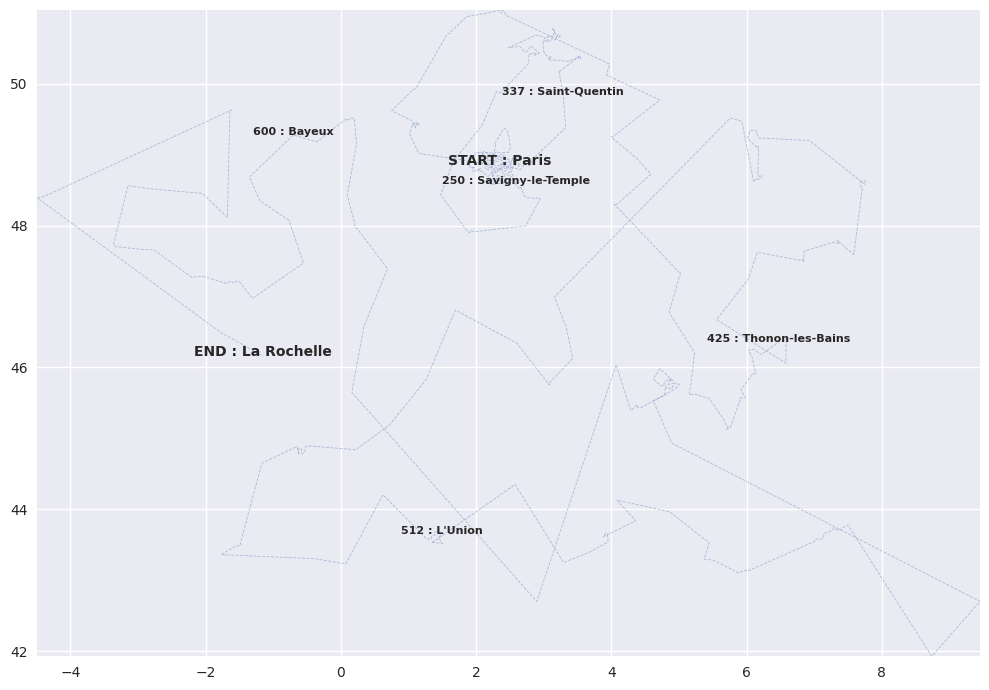

In [365]:
t = [v[0] for v in itineraire]
x = [float(v[1]) for v in itineraire]
y = [float(v[2]) for v in itineraire]

y_min = min([float(v[1]) for v in itineraire])
y_max = max([float(v[1]) for v in itineraire])

x_min = min([float(v[2]) for v in itineraire])
x_max = max([float(v[2]) for v in itineraire])

plt.figure(figsize=(10, 7))
plt.plot(y, x, "--", lw=0.6, alpha=0.4)

for i in np.linspace(250, 600, 5).astype(int):
    plt.text(y[i], x[i], f"{i} : {t[i]}", ha="center", fontsize=8, fontweight="bold")

i = 0
plt.text(y[i], x[i], f"START : {t[i]}", ha="center", fontsize=10, fontweight="bold")

i = len(itineraire) - 1
plt.text(y[i], x[i], f"END : {t[i]}", ha="center", fontsize=10, fontweight="bold")
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()